**Carga de librerias, paquetes y bases de datos**

In [1]:
#Conexión con colab
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from unicodedata import normalize

Mounted at /content/drive


In [2]:
#Importar paquetes
import pandas as pd
import numpy as np
from unicodedata import normalize
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objs as go #Graficos
import plotly.express as px
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt ### gráficos
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [3]:
#Leer cada una de las bases de datos
expustos= pd.read_table('/content/drive/MyDrive/CursoAnalitica3/BD_Expuestos.txt')
socio =pd.read_table('/content/drive/MyDrive/CursoAnalitica3/BD_Sociodemograficas.txt', encoding='latin-1')
siniestros =pd.read_table('/content/drive/MyDrive/CursoAnalitica3/DB_Siniestros.txt',encoding='latin-1')

**Limpieza y transformación de datos**

Base de datos de expuestos

In [4]:
#Observar los primeros cinco datos de la base de datos expuestos 
expustos.head(5)

,Asegurado_Id,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN
0,16286173,125696117,2018/01/01,2018/04/10,2018/04/10
1,11885152,141320760,2018/01/01,NaN,2019/12/31
2,763957,162532851,2018/01/01,NaN,2019/12/31
3,29082204,154620473,2018/01/01,2018/04/19,2018/04/19
4,4567640,93633862,2018/01/01,NaN,2019/12/31


In [5]:
#Pasar el nombre de las columnas a minusculas
print(expustos.columns)
expustos.columns= expustos.columns.str.lower()

Index(['Asegurado_Id', 'Poliza_Asegurado_Id', 'FECHA_INICIO',
       'FECHA_CANCELACION', 'FECHA_FIN'],
      dtype='object')


In [6]:
#Tipo de variables de la base de datos expuestos 
expustos.dtypes

asegurado_id            int64
poliza_asegurado_id     int64
fecha_inicio           object
fecha_cancelacion      object
fecha_fin              object
dtype: object

In [7]:
#Dimensión de base de datos expuestos 
expustos.shape

(300900, 5)

In [8]:
#Información de base de datos expuestos 
#No hay presencia de datos nulos
expustos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   asegurado_id         300900 non-null  int64 
 1   poliza_asegurado_id  300900 non-null  int64 
 2   fecha_inicio         300900 non-null  object
 3   fecha_cancelacion    151963 non-null  object
 4   fecha_fin            300900 non-null  object
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [9]:
#Cambar el tipo de dato de las fechas a datetime
expustos['fecha_inicio']=pd.to_datetime(expustos['fecha_inicio'])
expustos['fecha_cancelacion']=pd.to_datetime(expustos['fecha_cancelacion'])
expustos['fecha_fin']=pd.to_datetime(expustos['fecha_fin'])

In [10]:
#Verificar el tipo de datos de las fechas
expustos.dtypes

asegurado_id                    int64
poliza_asegurado_id             int64
fecha_inicio           datetime64[ns]
fecha_cancelacion      datetime64[ns]
fecha_fin              datetime64[ns]
dtype: object

In [11]:
#Reemplazar datos nulos por 0
expustos=expustos.fillna(0)

In [12]:
#Función de categorizar la variable fecha de cancelación en 0 y 1
def categorizar(fila):
    fecha_cancelacion = fila.fecha_cancelacion
    if fecha_cancelacion  == 0:
      return 0
    else:
      return 1


In [13]:
#Crear nuevo campo llamado Cancelación con la función categorizar
expustos["Cancelacion"] = expustos.apply(categorizar, axis=1)

In [14]:
#Observar nuevamente la base de datos de expuestos al realizar la depuración de los datos
expustos

,asegurado_id,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,Cancelacion
0,16286173,125696117,2018-01-01,2018-04-10 00:00:00,2018-04-10,1
1,11885152,141320760,2018-01-01,0,2019-12-31,0
2,763957,162532851,2018-01-01,0,2019-12-31,0
3,29082204,154620473,2018-01-01,2018-04-19 00:00:00,2018-04-19,1
4,4567640,93633862,2018-01-01,0,2019-12-31,0
...,...,...,...,...,...,...
300895,28476983,53646742,2018-01-01,0,2019-12-31,0
300896,8479396,89963102,2018-01-01,2018-03-08 00:00:00,2018-03-08,1
300897,6598270,165960557,2018-02-28,0,2019-12-31,0
300898,1000907,105811540,2018-01-01,0,2019-12-31,0


Base de datos de siniestros

In [15]:
#Observar los primeros cinco datos de la base de datos de siniestros
siniestros.head(5)

,Mes_Pago,Asegurado_Id,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado
0,201803,4834968,EXAMENES DE DIAGNOSTICO,Z011,EXAMEN DE OÍDOS Y DE LA AUDICIÓN,1,111600.00
1,201909,14915125,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,1,50468.00
2,201807,42959949,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,1,610452.00
3,201803,30540131,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,42160.00
4,201905,21442420,LABORATORIO CLINICO,9,DIAGNÓSTICO PENDIENTE,18,617336.48


In [16]:
#Observar columnas de base de datos siniestros y pasar columnas a minusculas
siniestros.columns
siniestros.columns= siniestros.columns.str.lower()

In [17]:
#Tipo de datos de la base de datos siniestros
siniestros.dtypes

mes_pago                int64
asegurado_id            int64
reclamacion            object
diagnostico_codigo     object
diagnostico_desc       object
eventos                 int64
valor_pagado          float64
dtype: object

In [18]:
#Dimensiones de la base de datos siniestros
siniestros.shape

(3308480, 7)

In [19]:
#Información de la base de datos siniestros 
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308480 entries, 0 to 3308479
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   mes_pago            int64  
 1   asegurado_id        int64  
 2   reclamacion         object 
 3   diagnostico_codigo  object 
 4   diagnostico_desc    object 
 5   eventos             int64  
 6   valor_pagado        float64
dtypes: float64(1), int64(3), object(3)
memory usage: 176.7+ MB


In [20]:
#Observar si existen datos nulos 
siniestros.isnull().sum()

mes_pago              0
asegurado_id          0
reclamacion           0
diagnostico_codigo    0
diagnostico_desc      0
eventos               0
valor_pagado          0
dtype: int64

In [21]:
#Imprimir categorias de las variables
lista = ['reclamacion','diagnostico_codigo','diagnostico_desc']
for i in lista:
    print(siniestros[i].value_counts())
    print('------------------------------------')

CONSULTA EXTERNA                                                   1255793
EXAMENES DE DIAGNOSTICO                                             694238
LABORATORIO CLINICO                                                 520214
CONSULTA DE URGENCIAS                                               365872
CIRUGIA AMBULATORIA POR ENFERMEDAD                                  106397
FISIOTERAPIA ILIMITADA                                               98370
TRATAMIENTOS ESPECIFICOS                                             49708
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                        39360
CONSULTAS PRENATALES                                                 33685
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                       28504
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                   20484
CIRUGIA AMBULATORIA POR ACCIDENTE                                    17594
TRATAMIENTO AMBULATORIO POR CANCER                                   14949
INFILTRACIONES           

Base de datos sociodemograficas

In [22]:
#Observar los primeros cinco datos de la base de datos sociodemografica
socio.head(5)

,Asegurado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,18686469,F,1984/01/17,REGIONAL ANTIOQUIA,0,0,0,0,0
1,16087775,M,1984/03/12,REGIONAL NORTE,0,0,0,0,0
2,35757761,F,1993/12/19,REGIONAL ANTIOQUIA,0,0,0,0,0
3,48691460,M,2000/11/14,REGIONAL ANTIOQUIA,0,0,0,0,0
4,36074099,F,2015/08/06,REGIONAL CENTRO,0,0,0,0,0


In [23]:
#Observar columnas de la base de datos sociodemografica y pasar las columnas a minusculas
socio.columns
socio.columns= socio.columns.str.lower()

In [24]:
#Tipos de datos de la base de datos sociodemografica
socio.dtypes

asegurado_id           int64
sexo_cd               object
fechanacimiento       object
regional              object
cancer                 int64
epoc                   int64
diabetes               int64
hipertension           int64
enf_cardiovascular     int64
dtype: object

In [25]:
#Convertir tipo de dato de object a datetime de la fecha de nacimiento
socio['fechanacimiento']=pd.to_datetime(socio['fechanacimiento'])

In [26]:
#Observar dimensiones de la base de datos sociodemografica 
socio.shape

(267312, 9)

In [27]:
#Información de la base de datos sociodemografica
socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   asegurado_id        267312 non-null  int64         
 1   sexo_cd             267312 non-null  object        
 2   fechanacimiento     267312 non-null  datetime64[ns]
 3   regional            267311 non-null  object        
 4   cancer              267312 non-null  int64         
 5   epoc                267312 non-null  int64         
 6   diabetes            267312 non-null  int64         
 7   hipertension        267312 non-null  int64         
 8   enf_cardiovascular  267312 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 18.4+ MB


In [28]:
#Imprimir categorias de las variables
lista = ['sexo_cd','regional','cancer',
       'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular']
for i in lista:
    print(socio[i].value_counts())
    print('------------------------------------')

F     145430
M     121877
-1         5
Name: sexo_cd, dtype: int64
------------------------------------
REGIONAL CENTRO          127149
REGIONAL ANTIOQUIA        49722
REGIONAL OCCIDENTE        46180
REGIONAL NORTE            34845
REGIONAL EJE CAFETERO      9342
Sin Información              73
Name: regional, dtype: int64
------------------------------------
0    262929
1      4383
Name: cancer, dtype: int64
------------------------------------
0    266055
1      1257
Name: epoc, dtype: int64
------------------------------------
0    263774
1      3538
Name: diabetes, dtype: int64
------------------------------------
0    250566
1     16746
Name: hipertension, dtype: int64
------------------------------------
0    266387
1       925
Name: enf_cardiovascular, dtype: int64
------------------------------------


In [29]:
#Pasar los nulos de usuarios a sin información
socio['sexo_cd'] = socio['sexo_cd'].replace('-1','F')

In [30]:
#Eliminar el resto de datos nulos
socio=socio.dropna()

In [31]:
#Calcular edad 
socio['edad']=2019-socio.fechanacimiento.dt.year

In [32]:
#Contar los valores de edad
socio['edad'].value_counts()

 35     6748
 38     6745
 39     6735
 37     6587
 34     6526
        ... 
-2         3
 102       3
-3         2
 103       2
 105       1
Name: edad, Length: 109, dtype: int64

In [33]:
#Volver la edad 0 si la resta es un valor menor a cero
socio.loc[socio[socio.edad<0].index,['edad']]=0

In [35]:
#Función para categorizar la edad 
def categorizar1(fila):
    edad = fila.edad
    if edad  < 6:
      return 'Primera infancia'
    elif edad < 11:
      return 'Infancia'
    elif edad < 18:
      return 'Adolescencia'
    elif edad < 28:
      return 'Jovenes'
    elif edad <59:
      return'Adultez'
    elif edad >60:
      return 'Persona Mayor'


In [36]:
#Crear variable curso de vida donde se aplica la función categorizar1 para clasificar los datos 
socio["curso de vida"] = socio.apply(categorizar1, axis=1)

Union de las bases de datos

In [38]:
#Se une la base de datos sociodemograficas y la base de datos de siniestros 
dfcx = pd.merge(socio,siniestros, on = 'asegurado_id',how = 'inner')
dfcx.head(3)

,asegurado_id,sexo_cd,fechanacimiento,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,curso de vida,mes_pago,reclamacion,diagnostico_codigo,diagnostico_desc,eventos,valor_pagado
0,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,Adultez,201912,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,3,1027462.76
1,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,Adultez,201912,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,67208.00
2,16087775,M,1984-03-12,REGIONAL NORTE,0,0,0,0,0,35,Adultez,201810,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,83111.00


In [39]:
#Se observa si existe algún dato nulo
dfcx.isnull().sum()

asegurado_id              0
sexo_cd                   0
fechanacimiento           0
regional                  0
cancer                    0
epoc                      0
diabetes                  0
hipertension              0
enf_cardiovascular        0
edad                      0
curso de vida         80806
mes_pago                  0
reclamacion               0
diagnostico_codigo        0
diagnostico_desc          0
eventos                   0
valor_pagado              0
dtype: int64

In [40]:
#Se une la base de datos creada anteriormente dfcx con expuestos1
dfcx1 = pd.merge(dfcx,expustos, on = 'asegurado_id',how = 'inner')
dfcx1.head(3)

,asegurado_id,sexo_cd,fechanacimiento,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,...,reclamacion,diagnostico_codigo,diagnostico_desc,eventos,valor_pagado,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,Cancelacion
0,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,...,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,3,1027462.76,202863951,2019-10-31,0,2019-12-31,0
1,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,...,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,67208.00,202863951,2019-10-31,0,2019-12-31,0
2,16087775,M,1984-03-12,REGIONAL NORTE,0,0,0,0,0,35,...,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,83111.00,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1


In [41]:
#Observar dimensión de nueva base de datos 
dfcx1.shape

(3781424, 22)

In [42]:
#Observar si existe la presencia de datos nulos
dfcx1.isnull().sum()

asegurado_id               0
sexo_cd                    0
fechanacimiento            0
regional                   0
cancer                     0
epoc                       0
diabetes                   0
hipertension               0
enf_cardiovascular         0
edad                       0
curso de vida          93009
mes_pago                   0
reclamacion                0
diagnostico_codigo         0
diagnostico_desc           0
eventos                    0
valor_pagado               0
poliza_asegurado_id        0
fecha_inicio               0
fecha_cancelacion          0
fecha_fin                  0
Cancelacion                0
dtype: int64

In [43]:
#Se elimina la variable de curso de vida
dfcx1=dfcx1.drop(['curso de vida'], axis=1)

In [44]:
#Se crea nuevamente el campo de curso de vida y se aplica la función de categorizar
dfcx1["curso de vida"] = dfcx1.apply(categorizar1, axis=1)

In [45]:
#Contar los valores del campo curso de vida
dfcx1['curso de vida'].value_counts()

Adultez             2097884
Persona Mayor        547524
Primera infancia     386750
Jovenes              301243
Adolescencia         178583
Infancia             176431
Name: curso de vida, dtype: int64

In [46]:
#Eliminar datos nulos de la base de datos unida 
dfcx1=dfcx1.dropna()

**Análisis Exploratorio**

In [47]:
df=pd.Series(expustos.fecha_fin - expustos.fecha_inicio).dt.days.value_counts().reset_index().rename(columns={'index':'Dias',0:'tamaño'})

In [48]:
#Tiempo en dias en que las personas piden los seguros.
fig=px.bar(df.drop(index=[0,1]),x='Dias', y='tamaño', color_discrete_sequence =  px.colors.sequential.Aggrnyl)
fig.update_layout(font=dict(size=15)) 
fig.show()

In [49]:
#Distribucion de las personas que cancenlan el seguro antes de terminar
# crear dataset
dic = {0:'No canceló',
       1:'Canceló'}
base = expustos.groupby(['Cancelacion'])[['asegurado_id']].count().sort_values('asegurado_id', ascending = False).reset_index()
base['Cancelacion'] = base['Cancelacion'].replace(dic)
# crear gráfica
fig = px.pie(base, values = 'asegurado_id', names ='Cancelacion',
             title= '<b>Participación de las personas que cancenlan el seguro antes de terminar<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [50]:
df=pd.Series(expustos.fecha_inicio.dt.month_name().value_counts()).reset_index().rename(columns={'index':'Mes','fecha_inicio':'tamaño'})

In [51]:
#Diagrama de barras de mes y tamaño
fig=px.bar(df,x='Mes',y='tamaño',color_discrete_sequence =  px.colors.sequential.Aggrnyl )
fig.update_layout(font=dict(size=15))
fig.show()

Exploración de base de datos Siniestros

In [52]:
# crear dataset
base = siniestros.groupby(['diagnostico_desc'])[['valor_pagado']].sum().sort_values('valor_pagado', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'diagnostico_desc', y='valor_pagado',
             title= '<b>Costos por el diagnostico<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [53]:
# crear dataset
base = siniestros.groupby(['reclamacion'])[['valor_pagado']].sum().sort_values('valor_pagado', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'reclamacion', y='valor_pagado',
             title= '<b>Costos por el tipo de reclamacion<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Exploracion de base de datos Socio 

In [54]:
# crear dataset
base = socio.groupby(['sexo_cd'])[['asegurado_id']].count().sort_values('asegurado_id', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'asegurado_id', names ='sexo_cd',
             title= '<b>Participación del sexo en los seguros de vida b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [55]:
# crear dataset
base = socio.groupby(['curso de vida'])[['asegurado_id']].count().sort_values('asegurado_id', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'asegurado_id', names ='curso de vida',
             title= '<b>Participación del curso de vida en los seguros de vida b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [56]:
# crear dataset
base = socio.groupby(['regional'])[['asegurado_id']].count().sort_values('asegurado_id', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'regional', y='asegurado_id',
             title= '<b>Cantidad de personas por region<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Análisis exploratorio de base de datos concatenada

In [57]:
#Columnas de la base de datos unida
dfcx1.columns

Index(['asegurado_id', 'sexo_cd', 'fechanacimiento', 'regional', 'cancer',
       'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular', 'edad',
       'mes_pago', 'reclamacion', 'diagnostico_codigo', 'diagnostico_desc',
       'eventos', 'valor_pagado', 'poliza_asegurado_id', 'fecha_inicio',
       'fecha_cancelacion', 'fecha_fin', 'Cancelacion', 'curso de vida'],
      dtype='object')

In [58]:
#Sacar el año de la fecha de inicio
dfcx1['año'] = dfcx1['fecha_inicio'].dt.year 

In [59]:
# crear dataset

base = dfcx1.groupby(['curso de vida', 'año'])[['valor_pagado']].sum().reset_index()
# MSSubClass: Tipo de edificio
# YrSold: Año en que se vende
# SalePrice: Precio de venta

# crear gráfica
fig = px.bar(base, x = 'año', y='valor_pagado', color = 'curso de vida', barmode = 'group', title= '<b>costos según el curso de vida por año<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [60]:
# crear dataset
base = dfcx1.groupby(['sexo_cd', 'año'])[['valor_pagado']].sum().reset_index()

# crear gráfica
fig = px.bar(base, x = 'año', y='valor_pagado', color = 'sexo_cd', barmode = 'group', 
             title= '<b>Precio de venta según el tipo de acceso al edificio<b>',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

**Selección de variables**

In [61]:
#Convertir las columnas de variables en minusculas 
dfcx1.columns = dfcx1.columns.str.lower()
#Inforación general de la base de datos
dfcx1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688415 entries, 0 to 3781423
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   asegurado_id         int64         
 1   sexo_cd              object        
 2   fechanacimiento      datetime64[ns]
 3   regional             object        
 4   cancer               int64         
 5   epoc                 int64         
 6   diabetes             int64         
 7   hipertension         int64         
 8   enf_cardiovascular   int64         
 9   edad                 int64         
 10  mes_pago             int64         
 11  reclamacion          object        
 12  diagnostico_codigo   object        
 13  diagnostico_desc     object        
 14  eventos              int64         
 15  valor_pagado         float64       
 16  poliza_asegurado_id  int64         
 17  fecha_inicio         datetime64[ns]
 18  fecha_cancelacion    object        
 19  fecha_fin            

In [62]:
#Imprimir categorias de las variables
lista = ['sexo_cd', 'regional', 'cancer',
       'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular','mes_pago', 
       'reclamacion', 'diagnostico_codigo', 'diagnostico_desc',
       'poliza_asegurado_id','cancelacion', 'curso de vida','año']
for i in lista:
    print(dfcx1[i].value_counts())
    print('------------------------------------')

F    2330673
M    1357742
Name: sexo_cd, dtype: int64
------------------------------------
REGIONAL CENTRO          1962074
REGIONAL OCCIDENTE        616629
REGIONAL ANTIOQUIA        585920
REGIONAL NORTE            426668
REGIONAL EJE CAFETERO      96533
Sin Información              591
Name: regional, dtype: int64
------------------------------------
0    3532842
1     155573
Name: cancer, dtype: int64
------------------------------------
0    3646627
1      41788
Name: epoc, dtype: int64
------------------------------------
0    3560404
1     128011
Name: diabetes, dtype: int64
------------------------------------
0    3221948
1     466467
Name: hipertension, dtype: int64
------------------------------------
0    3652662
1      35753
Name: enf_cardiovascular, dtype: int64
------------------------------------
201907    173285
201910    173075
201912    172942
201909    171037
201905    163318
201903    162856
201810    162188
201911    160695
201908    159645
201812    159211
201904 

In [63]:
# Aplicar funciones para homologar a nivel general.
lista = ['sexo_cd', 'regional' ,'reclamacion', 'diagnostico_desc']
for i in lista:
    dfcx1[i] = dfcx1[i].str.lower() #minuscula
    dfcx1[i] = dfcx1[i].str.strip() #espacios
    dfcx1[i] = dfcx1[i].apply(lambda x: normalize("NFKD", x).encode("ascii", "ignore").decode("ascii") if pd.notnull(x) else x)

In [64]:
#Observar los primeros cinco datos de la base de datos despúes de la depuración
dfcx1.head(5)

,asegurado_id,sexo_cd,fechanacimiento,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,...,diagnostico_desc,eventos,valor_pagado,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,cancelacion,curso de vida,año
0,18686469,f,1984-01-17,regional antioquia,0,0,0,0,0,35,...,diagnostico pendiente,3,1027462.76,202863951,2019-10-31,0,2019-12-31,0,Adultez,2019
1,18686469,f,1984-01-17,regional antioquia,0,0,0,0,0,35,...,diagnostico pendiente,1,67208.00,202863951,2019-10-31,0,2019-12-31,0,Adultez,2019
2,16087775,m,1984-03-12,regional norte,0,0,0,0,0,35,...,diagnostico pendiente,1,83111.00,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,Adultez,2018
3,16087775,m,1984-03-12,regional norte,0,0,0,0,0,35,...,diagnostico pendiente,1,194166.64,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,Adultez,2018
4,16087775,m,1984-03-12,regional norte,0,0,0,0,0,35,...,diagnostico pendiente,1,77729.40,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,Adultez,2018


In [65]:
#Eliminar datos duplicados de la base de datos 
dfcx1 = dfcx1.drop_duplicates()
#Observar la dimensión de la base de datos despúes de eliminar duplicados 
dfcx1.shape

(3688415, 23)

In [66]:
#Contar los valores de diagnostico_desc
df1 = pd.DataFrame(dfcx1['diagnostico_desc'].value_counts().reset_index())
df1

,index,diagnostico_desc
0,diagnostico pendiente,3056717
1,examen de laboratorio,116289
2,otros controles generales de salud de rutina d...,23647
3,"hipotiroidismo, no especificado",21368
4,hipertension esencial (primaria),11498
...,...,...
5699,deficiencia dietetica de zinc,1
5700,"trastorno del desarrollo de los dientes, no es...",1
5701,tumor maligno de la corteza de la glandula sup...,1
5702,"osteoporosis inducida por drogas, sin fractura...",1


In [67]:
#Eliminar datos que sean menores de 100 con el fin que esto no aporta con la predicción de la variable target
df2 = df1.drop(df1[df1['diagnostico_desc']<100].index)
df2

,index,diagnostico_desc
0,diagnostico pendiente,3056717
1,examen de laboratorio,116289
2,otros controles generales de salud de rutina d...,23647
3,"hipotiroidismo, no especificado",21368
4,hipertension esencial (primaria),11498
...,...,...
592,tenosinovitis de estiloides radial [de quervain],101
593,otros hallazgos anormales en diagnostico por i...,101
594,liquen simple cronico,101
595,otros trastornos funcionales del parpado,100


In [68]:
#Renombras las columnas de df2
df2= df2.rename(columns={'index':'diagnostico_desc','diagnostico_desc':'cuenta'})

In [69]:
#Observar df2 despúes de los cambios de nombre que se realizaron
df2

,diagnostico_desc,cuenta
0,diagnostico pendiente,3056717
1,examen de laboratorio,116289
2,otros controles generales de salud de rutina d...,23647
3,"hipotiroidismo, no especificado",21368
4,hipertension esencial (primaria),11498
...,...,...
592,tenosinovitis de estiloides radial [de quervain],101
593,otros hallazgos anormales en diagnostico por i...,101
594,liquen simple cronico,101
595,otros trastornos funcionales del parpado,100


In [70]:
#Unir bases de datos df2 y dfcx1
dfcx3 = pd.merge(df2,dfcx1, on = 'diagnostico_desc',how = 'inner')
dfcx3.head(3)

,diagnostico_desc,cuenta,asegurado_id,sexo_cd,fechanacimiento,regional,cancer,epoc,diabetes,hipertension,...,diagnostico_codigo,eventos,valor_pagado,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,cancelacion,curso de vida,año
0,diagnostico pendiente,3056717,18686469,f,1984-01-17,regional antioquia,0,0,0,0,...,9,3,1027462.76,202863951,2019-10-31,0,2019-12-31,0,Adultez,2019
1,diagnostico pendiente,3056717,18686469,f,1984-01-17,regional antioquia,0,0,0,0,...,9,1,67208.00,202863951,2019-10-31,0,2019-12-31,0,Adultez,2019
2,diagnostico pendiente,3056717,16087775,m,1984-03-12,regional norte,0,0,0,0,...,9,1,83111.00,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,Adultez,2018


In [71]:
#Observar dimensiones de la nueva base de datos
dfcx3.shape

(3618065, 24)

In [72]:
#Eliminar datos duplicados y seleccionando el último dato de asegurad_id
dfcx3=dfcx3.drop_duplicates(subset=['asegurado_id'])

In [73]:
#Observar si existe la presencia de datos nulos 
dfcx3.isnull().sum()

diagnostico_desc       0
cuenta                 0
asegurado_id           0
sexo_cd                0
fechanacimiento        0
regional               0
cancer                 0
epoc                   0
diabetes               0
hipertension           0
enf_cardiovascular     0
edad                   0
mes_pago               0
reclamacion            0
diagnostico_codigo     0
eventos                0
valor_pagado           0
poliza_asegurado_id    0
fecha_inicio           0
fecha_cancelacion      0
fecha_fin              0
cancelacion            0
curso de vida          0
año                    0
dtype: int64

In [74]:
#Contar datos del campo diagnostico_desc
dfcx3['diagnostico_desc'].value_counts()

diagnostico pendiente                                                             229953
examen de laboratorio                                                                164
traumatismo superficial de region no especificada del cuerpo                          73
otros controles generales de salud de rutina de otras subpoblaciones definidas        45
esguinces y torceduras del tobillo                                                    39
                                                                                   ...  
infeccion aguda de las vias respiratorias superiores, no especificada                  1
falso trabajo de parto antes de las 37 semanas completas de gestacion                  1
polipo del cuerpo del utero                                                            1
esguinces y torceduras de otras partes y las no especificadas de la rodilla            1
tendinitis rotuliana                                                                   1
Name: diagnostico_des

In [75]:
#Eliminar los siguientes campos de la base de datos dfcx3
dfcx3 = dfcx3.drop(['asegurado_id', 'fechanacimiento',
       'mes_pago', 'diagnostico_codigo','poliza_asegurado_id', 'fecha_inicio',
       'fecha_cancelacion', 'fecha_fin', 'cancelacion','curso de vida','cuenta'],axis=1)

In [76]:
# Convertir variableas categóricas en dummies
dfcx3_dummies = pd.get_dummies(dfcx3,columns=['sexo_cd','regional','reclamacion','diagnostico_desc'])
dfcx3_dummies.shape

(231089, 306)

In [77]:
#Observar las dimensiones de la base datos depurada
dfcx3_dummies.shape

(231089, 306)

In [78]:
# Descargar la BD depurada
dfcx3_dummies.to_csv('nueva.csv')

In [79]:
#Determinar las columna target
X = dfcx3_dummies.loc[:,~dfcx3_dummies.columns.isin(['valor_pagado'])]
y = dfcx3_dummies['valor_pagado']

**Selección del modelo**

In [80]:
# Modelos candidatos, teniendo en cuenta que es un problema de regresión
m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

In [81]:
# Se crea una lista con los anteriores modelos
modelos=list([m_lreg,m_rtree, m_rf, m_gbt])

In [82]:
#Se crea una función para determinar que variables se van a elegir, teniendo en cuenta la lista anteriormente mencionada
def sel_variables(modelos,X,y, SelectFromModel,np,threshold):
    
    var_names_ac=np.array([])
    for modelo in modelos:
        #modelo=modelos[i]
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
        var_names_ac=np.unique(var_names_ac)
    
    return var_names_ac

In [83]:
# Variables seleccionadas, en este caso se trabajarán con 118
var_names = sel_variables(modelos, X, y, SelectFromModel, np, threshold="3*mean")
var_names.shape

(46,)

In [84]:
# Nombres de las variables seleccionadas
var_names

array(['año', 'cancer', 'diagnostico_desc_caries de la dentina',
       'diagnostico_desc_dificultad respiratoria del recien nacido, no especificada',
       'diagnostico_desc_enfermedad por virus de la inmunodeficiencia humana [vih], sin otra especificacion',
       'diagnostico_desc_falso trabajo de parto antes de las 37 semanas completas de gestacion',
       'diagnostico_desc_otros recien nacidos pretermino',
       'diagnostico_desc_sindrome de dificultad respiratoria del recien nacido',
       'edad', 'eventos', 'reclamacion_anexo exequial',
       'reclamacion_atencion del parto',
       'reclamacion_cirugia ambulatoria por accidente',
       'reclamacion_cirugia ambulatoria por enfermedad',
       'reclamacion_conciliacion', 'reclamacion_consulta de urgencias',
       'reclamacion_consulta externa', 'reclamacion_consultas prenatales',
       'reclamacion_examenes de diagnostico',
       'reclamacion_fisioterapia ilimitada', 'reclamacion_funerarios',
       'reclamacion_infiltra

In [85]:
# Matriz con variables seleccionadas
X2 = X[var_names]

In [86]:
# Se crea una función para poder elegir el mejor modelo de los 4 anteriormente mencionados.
def medir_modelos(modelos,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["reg_lineal","decision_tree","random_forest","gradient_boosting"]
    return metric_modelos

In [87]:
# Se analiza el mape y rmse para definir el mejor modelo.
mape_varsel= medir_modelos(modelos,"neg_mean_absolute_percentage_error",X2,y,10, cross_val_score, pd)
rmse_varsel= medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,10, cross_val_score, pd)

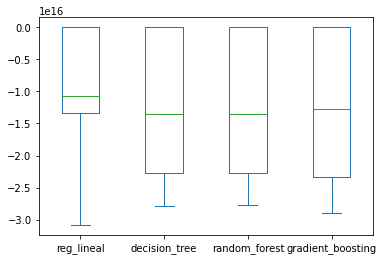

In [88]:
#Mape de los diferentes modelos
mape_varsel.plot(kind='box')

**Afinamiento de hiperparámetros y evaluación del modelo**

In [89]:
# Hiperparametros
param_grid = [{'n_estimators': [3, 500, 100], 'max_features': [5,20]},
{'bootstrap': [False,True]}]


tun_rf=RandomizedSearchCV(m_rf,param_distributions=param_grid,n_iter=3,scoring="neg_root_mean_squared_error")
tun_rf.fit(X2,y)

resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]]

rf_final=tun_rf.best_estimator_ ### Guardar el modelo con hyperparameter tunning
m_lreg=m_lreg.fit(X2,y)

In [90]:
#Observar los resultados 
pd_resultados[["params","mean_test_score"]]

,params,mean_test_score
0,"{'n_estimators': 500, 'max_features': 20}",-377795.984625
1,{'bootstrap': False},-411747.851792
2,"{'n_estimators': 100, 'max_features': 20}",-376739.574895


In [91]:
#Evaluar con cross validation
eval =cross_validate(rf_final,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)

In [93]:
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

In [96]:
#Promedio de test score
train_test_rf["test_score"].mean()

-377110.9925533249

In [97]:
#Promedio de train score
train_test_rf["train_score"].mean()

-249232.9080472428

In [98]:
#Vector de predicciones generadas 
predictions=cross_val_predict(m_lreg,X2,y,cv=5)
predictions

array([ 419528.41289448,  159998.1015126 ,  130904.53787703, ...,
       5179112.22086465, 2119298.57597315, 2139772.97929777])

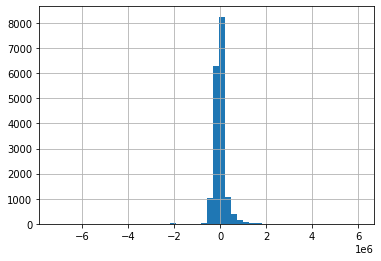

In [99]:
#Histograma del error
pred=pd.DataFrame(predictions,columns=['pred'])
pdy=y.to_frame()
error=pdy['valor_pagado']-pred['pred']
error.hist(bins=50)

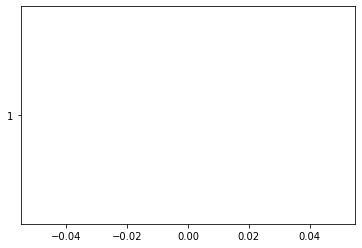

In [100]:
#Boxplot del error
plt.boxplot(error,vert=False)
plt.show()

In [101]:
#Evaluación de overfitting y underfitting
results = cross_validate(rf_final,X2,y,return_train_score=True,cv=5) 
results
test_scores = results['test_score']
train_scores = results['train_score']
#score de entrenamiento
print(np.mean(train_scores)) 
#score de prueba
print(np.mean(test_scores))

0.6964835596477231
0.13251350343473184


In [102]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                        X2,
                                        y,
                                        random_state = 123)

**Despliegue del modelo**

In [103]:
#Dataframe con las variables influyentes
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': rf_final.feature_importances_})
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,edad,2.144726e-01
7,diagnostico_desc_sindrome de dificultad respir...,1.206900e-01
6,diagnostico_desc_otros recien nacidos pretermino,1.067695e-01
32,reclamacion_tratamiento medico hospitalario po...,7.290899e-02
9,eventos,6.430680e-02
35,reclamacion_tratamiento quirurgico hospitalari...,5.643928e-02
1,cancer,4.661578e-02
0,año,4.569515e-02
38,regional_regional antioquia,3.722142e-02
39,regional_regional centro,3.579715e-02


In [112]:
# Renombrar las predicciones
df = pd_pred
df.columns

Index(['predicción costos de servicio de salud'], dtype='object')

In [113]:
# Redondear para obtener un número entero.
df = df.round()

In [114]:
# Renombrar la columna de predicción.
df1 = df.rename(columns={'0':'predicción costos de servicio de salud'},inplace=True)
df1

In [115]:
# Traer el ID de los pacientes.
ID = dfcx["asegurado_id"]
ID = pd.DataFrame(ID).reset_index()
ID = ID.drop(["index"],axis=1)

In [116]:
df.columns=["predicción costos de servicio de salud"]
df

,predicción costos de servicio de salud
0,419528.0
1,159998.0
2,130905.0
3,155518.0
4,124054.0
...,...
700,159542.0
701,349293.0
702,84107.0
703,113782.0


In [117]:
# Unir la predicción al ID del asegurado
perf_pred=pd.concat([ID,df],axis=1)
perf_pred

,asegurado_id,predicción costos de servicio de salud
0,18686469,419528.0
1,18686469,159998.0
2,16087775,130905.0
3,16087775,155518.0
4,16087775,124054.0
...,...,...
3306904,4419287,NaN
3306905,4419287,NaN
3306906,4419287,NaN
3306907,4419287,NaN
